<a href="https://colab.research.google.com/github/Sanjanareddy18/PRODIGY_DS_02/blob/main/prodigy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Country Name Country Code  Year    Value
0        Aruba          ABW  1960  54922.0
1        Aruba          ABW  1961  55578.0
2        Aruba          ABW  1962  56320.0
3        Aruba          ABW  1963  57002.0
4        Aruba          ABW  1964  57619.0


<ipython-input-1-076653cadfa4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Country Name', data=top_10_countries, palette='viridis')


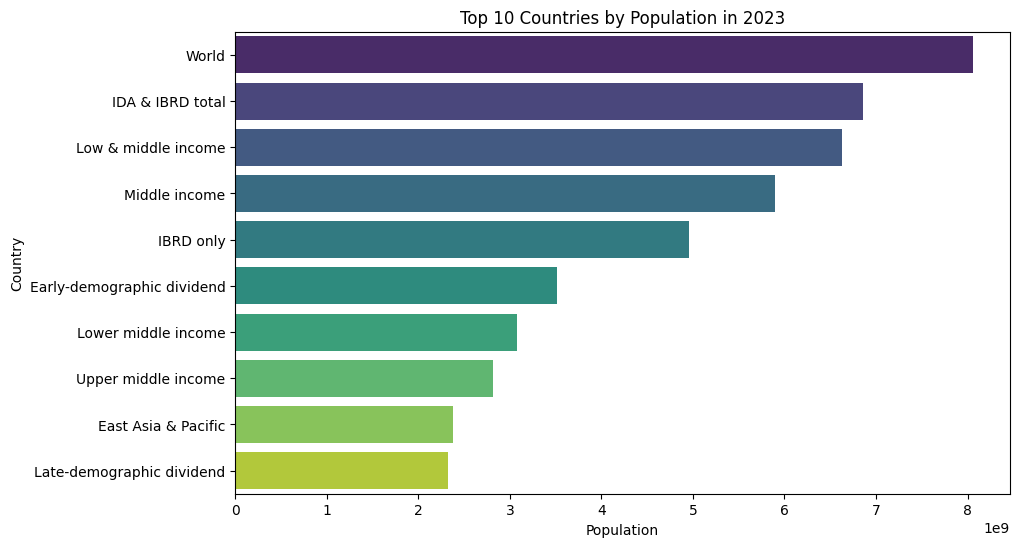

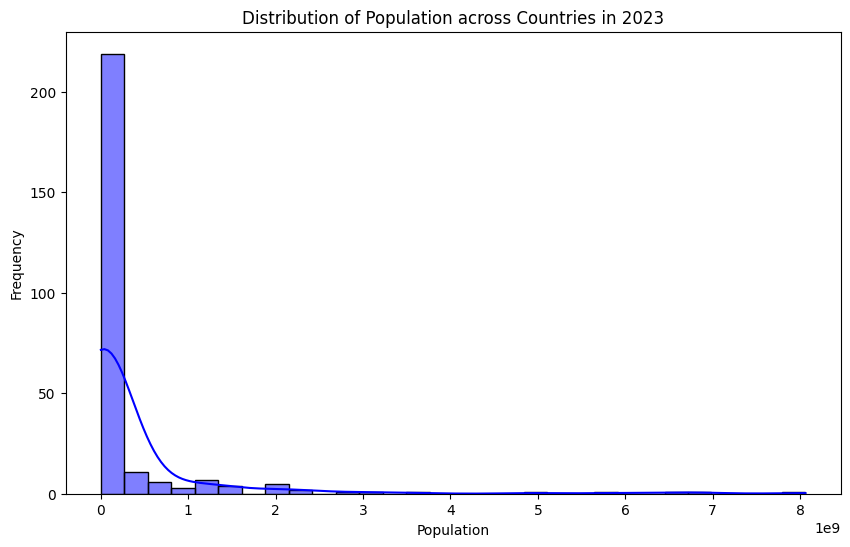

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace the file path with your own path)
# Example: data = pd.read_csv('path_to_downloaded_file.csv')
url = 'https://raw.githubusercontent.com/datasets/population/master/data/population.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

# Filter the dataset for the most recent year
latest_year = data['Year'].max()
latest_data = data[data['Year'] == latest_year]

# Sort the countries by population
latest_data_sorted = latest_data.sort_values(by='Value', ascending=False)

# Select the top 10 most populous countries for the bar chart
top_10_countries = latest_data_sorted.head(10)

# Create a bar chart for the top 10 most populous countries
plt.figure(figsize=(10, 6))
sns.barplot(x='Value', y='Country Name', data=top_10_countries, palette='viridis')
plt.title(f'Top 10 Countries by Population in {latest_year}')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()

# Create a histogram to visualize the distribution of populations across all countries
plt.figure(figsize=(10, 6))
sns.histplot(latest_data['Value'], bins=30, kde=True, color='blue')
plt.title(f'Distribution of Population across Countries in {latest_year}')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan  

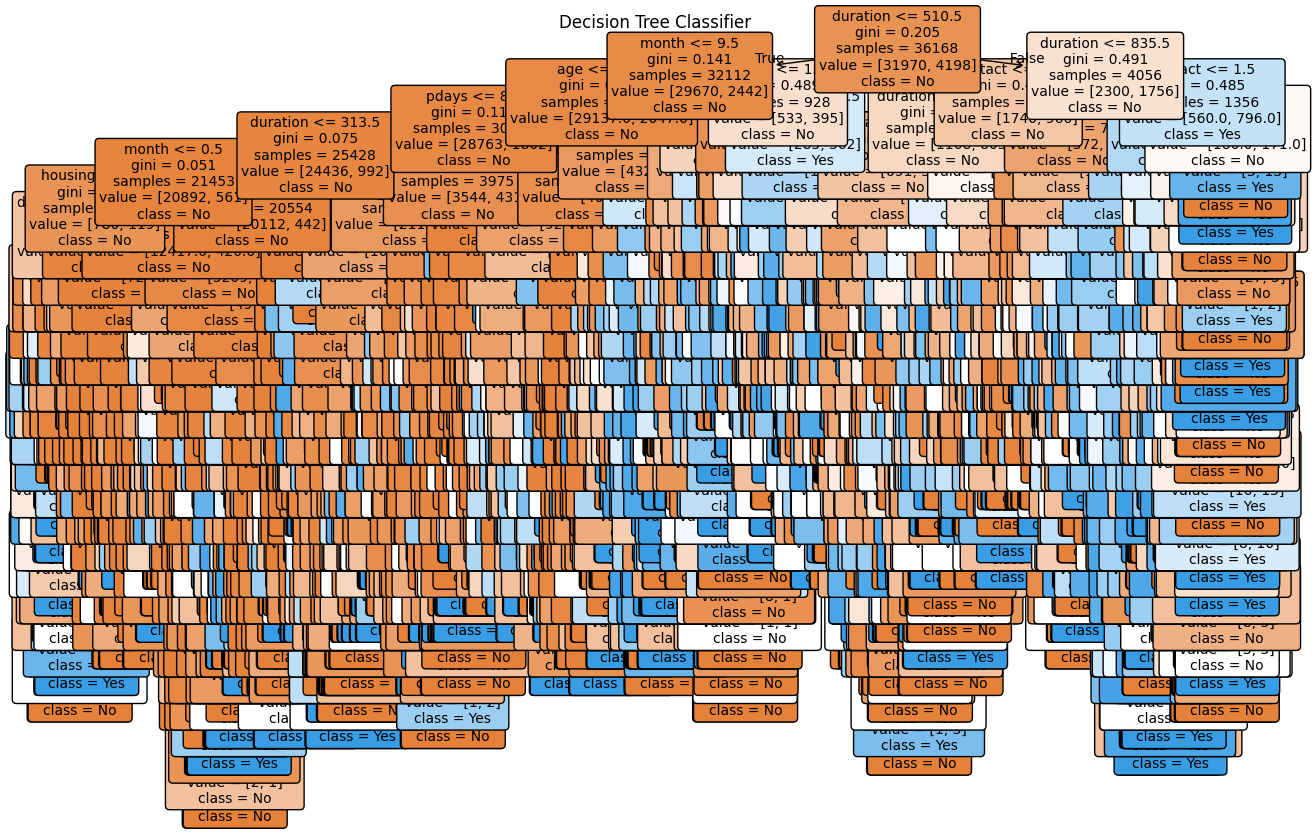

In [12]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
# Download the dataset if it's not available locally
import requests
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"  # UCI repository link for bank.zip
response = requests.get(url)
open("bank.zip", "wb").write(response.content)

# Unzip the downloaded file
import zipfile
with zipfile.ZipFile("bank.zip", 'r') as zip_ref:
    zip_ref.extractall("./")

# Now load the dataset using the correct path
df = pd.read_csv('bank-full.csv', delimiter=';')  # Assuming the dataset is in CSV format with ';' delimiter

# Checking the first few rows of the dataset
print(df.head())


# Data preprocessing

# Check for missing values
print(df.isnull().sum())

# Handle missing values if necessary, (e.g., fill with median, mode or drop rows)
# In this case, there are no missing values, but let's ensure no nulls
df = df.dropna()

# Encode categorical variables (using LabelEncoder for simplicity)
label_encoder = LabelEncoder()

# Encode categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the data types and check if encoding worked
print(df.dtypes)

# Split the data into features (X) and target variable (y)
X = df.drop('y', axis=1)  # Dropping the target variable column 'y'
y = df['y']  # Target variable ('y' = 1 if customer subscribed, 0 otherwise)

# Train-test split (80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True, fontsize=10)
plt.title("Decision Tree Classifier")
plt.show()


In [19]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
# Replace 'path/to/your/train.csv' with the actual path to your train.csv file
# For example: train_data = pd.read_csv('/home/user/Downloads/train.csv')
#train_data = pd.read_csv('/kaggle/input/titanic/train.csv') # Assuming the dataset is in the current working directory
train_data = pd.read_csv('train.csv')

# Check the first few rows of the dataset
print(train_data.head())

# 1. Data Cleaning

# Check for missing values
print(train_data.isnull().sum())

# Percentage of missing values
print((train_data.isnull().sum() / train_data.shape[0]) * 100)

# Fill missing 'Age' with the median
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

# Fill missing 'Embarked' with the most frequent value (mode)
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

# Fill missing 'Fare' with the median (if needed)
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].median())

# Drop the 'Cabin' column as it has too many missing values
train_data = train_data.drop(columns=['Cabin'])

# Verify that there are no more missing values
print(train_data.isnull().sum())

# Encode 'Sex' column: Male = 1, Female = 0
train_data['Sex'] = train_data['Sex'].map({'male': 1, 'female': 0})

# One-hot encode 'Embarked' column
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)

# Create a new feature 'FamilySize' = SibSp + Parch
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']

# Drop irrelevant columns
train_data = train_data.drop(columns=['Name', 'Ticket'])

# Check the cleaned data
print(train_data.head())

# 2. Exploratory Data Analysis (EDA)

# a) Survival Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_data, palette='Set2')
plt.title("Survival Distribution")
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# b) Survival by Passenger Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title("Survival by Passenger Class")
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# c) Survival by Sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title("Survival by Sex")
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# d) Survival by Age
plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Age', data=train_data)
plt.title("Survival by Age")
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# e) Survival by Fare
plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Fare', data=train_data)
plt.title("Survival by Fare")
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

# f) Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# g) Survival by Family Size
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=train_data)
plt.title("Survival by Family Size")
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

# Conclusion and Insights:
# 1. Missing Data: We handled missing data by filling 'Age' and 'Fare' with the median, and 'Embarked' with the mode.
# 2. Categorical Encoding: We encoded the 'Sex' column using binary encoding and used one-hot encoding for the 'Embarked' column.
# 3. Survival Insights:
#    - Passengers in Pclass 1 had the highest survival rate.
#    - Women had a higher survival rate than men.
#    - Younger passengers had a higher chance of survival.
#    - Passengers who paid higher fares had a higher chance of survival.
#    - Passengers traveling with family had a higher survival rate than those traveling alone.



FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [20]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import re

# Download the necessary NLTK data (if not already done)
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset (Make sure to replace with the correct path to the CSV file)
df = pd.read_csv('train.csv')

# Check the first few rows of the dataset
print(df.head())

# 1. Data Preprocessing
# Remove rows with missing values
df = df.dropna(subset=['text', 'sentiment'])

# Basic text cleaning
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply text cleaning function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Remove stopwords from the text
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)

# Check the cleaned text
print(df[['text', 'cleaned_text']].head())

# 2. Sentiment Analysis

# Sentiment classes: 'positive', 'negative', 'neutral'
# Check the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 3. Vectorization: Convert text data into numerical data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['sentiment']

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model Training: Using Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# 6. Model Evaluation
y_pred = model.predict(X_test)

# Print Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 7. Visualize Sentiment Distribution in Texts
# Word Cloud for Positive Sentiment
from wordcloud import WordCloud

positive_text = ' '.join(df[df['sentiment'] == 'positive']['cleaned_text'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(8, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')
plt.show()

# Word Cloud for Negative Sentiment
negative_text = ' '.join(df[df['sentiment'] == 'negative']['cleaned_text'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(8, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')
plt.show()

# Word Cloud for Neutral Sentiment
neutral_text = ' '.join(df[df['sentiment'] == 'neutral']['cleaned_text'])
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

plt.figure(figsize=(8, 6))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud')
plt.axis('off')
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [22]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load the dataset (Modify the path to where you have saved the dataset)
df = pd.read_csv('US_Accidents_Dec21.csv')  # Replace with the correct file path

# Check the first few rows of the dataset
print(df.head())

# 1. Data Preprocessing
# Check for missing values
print(df.isnull().sum())

# Handle missing values: Fill missing weather conditions with 'Unknown'
df['weather_condition'] = df['weather_condition'].fillna('Unknown')

# Handle missing values for road conditions by filling with 'Unknown'
df['road_condition'] = df['road_condition'].fillna('Unknown')

# Handle missing values for 'city', 'state', etc. (if any)
df['city'] = df['city'].fillna('Unknown')
df['state'] = df['state'].fillna('Unknown')

# Convert 'start_time' to datetime
df['start_time'] = pd.to_datetime(df['start_time'])

# Extract additional time features: Hour of the day and day of the week
df['hour'] = df['start_time'].dt.hour
df['day_of_week'] = df['start_time'].dt.dayofweek  # 0=Monday, 6=Sunday

# 2. Exploratory Data Analysis (EDA)

# a) Analyze the distribution of accidents by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df, palette='Set2')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# b) Analyze the distribution of accidents by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, palette='Set2')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# c) Analyze accidents by weather condition
plt.figure(figsize=(10, 6))
sns.countplot(x='weather_condition', data=df, palette='Set2', order=df['weather_condition'].value_counts().index)
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# d) Analyze accidents by road condition
plt.figure(figsize=(10, 6))
sns.countplot(x='road_condition', data=df, palette='Set2', order=df['road_condition'].value_counts().index)
plt.title('Accidents by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# e) Analyze accidents by contributing factors
# Contributing factors: 'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2', etc.
df['contributing_factor'] = df['contributing_factor_vehicle_1'].fillna('Unknown')
plt.figure(figsize=(10, 6))
sns.countplot(x='contributing_factor', data=df, palette='Set2', order=df['contributing_factor'].value_counts().index)
plt.title('Accidents by Contributing Factor')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# 3. Hotspot Mapping

# Filter the columns for mapping
df_map = df[['start_lat', 'start_lon']].dropna()

# Create a map centered around the US
m = folium.Map(location=[37.0902, -95.7129], zoom_start=5)

# Add a HeatMap layer
heat_data = [[row['start_lat'], row['start_lon']] for index, row in df_map.iterrows()]
HeatMap(heat_data).add_to(m)

# Display the map
m.save('accident_heatmap.html')


FileNotFoundError: [Errno 2] No such file or directory: 'US_Accidents_Dec21.csv'